# Importing Dependencies

In [1]:
from sklearn.metrics import confusion_matrix, classification_report
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import random
import cv2
import os


# How Data Looks

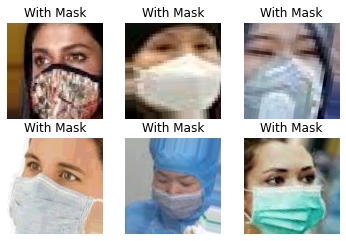

In [2]:
from os import listdir
listdir()
withmask='data/Train/WithMask'
train_images_NC=listdir(withmask)
plt.figure(figsize=(6,6))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(withmask,train_images_NC[i])),cmap='gray')
    plt.title('With Mask')
    plt.axis('off')
plt.show()

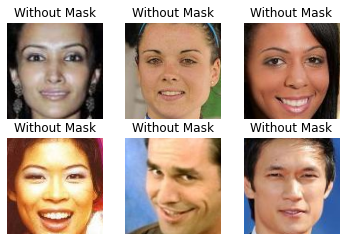

In [3]:
from os import listdir
listdir()
withoutmask='data/Train/WithoutMask'
train_images_NC=listdir(withoutmask)
plt.figure(figsize=(6,6))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join(withoutmask,train_images_NC[i])),cmap='gray')
    plt.title('Without Mask')
    plt.axis('off')
plt.show()

**Image Counts**

In [4]:
total_train_with_mask = len(os.listdir('data/Train/WithMask'))
total_train_without_mask = len(os.listdir('data/Train/WithoutMask'))
total_test_with_mask = len(os.listdir('data/Test/WithMask'))
total_test_without_mask = len(os.listdir('data/Test/WithoutMask'))
total_val_with_mask = len(os.listdir('data/Validation/WithMask'))
total_val_without_mask = len(os.listdir('data/Validation/WithoutMask'))

print("Train sets images with mask: {}".format(total_train_with_mask))
print('--------------------------------------------')
print("Train sets images without mask: {}".format(total_train_without_mask))
print('--------------------------------------------')
print("Test sets images with mask: {}".format(total_test_with_mask))
print('--------------------------------------------')
print("Test sets images without mask: {}".format(total_test_without_mask))
print('--------------------------------------------')
print("Val sets images with mask: {}".format(total_val_with_mask))
print('--------------------------------------------')
print("Val sets images without mask: {}".format(total_val_without_mask))

Train sets images with mask: 5000
--------------------------------------------
Train sets images without mask: 5000
--------------------------------------------
Test sets images with mask: 483
--------------------------------------------
Test sets images without mask: 509
--------------------------------------------
Val sets images with mask: 400
--------------------------------------------
Val sets images without mask: 400


# Image Proccessing

In [5]:
train_datagen = ImageDataGenerator( horizontal_flip=True,
                                   shear_range=0.2,
                                  rescale= 1./255,
                                  zoom_range=0.2,)

test_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

train_path='data/Train'
test_path = 'data/Test'
val_path = 'data/Validation'

train_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=32,
        shuffle = False,
        seed = 42,
         class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

test_set = test_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

val_set = val_datagen.flow_from_directory(
        val_path,
        target_size=(224,224),
        seed = 42,
        shuffle = False,
        batch_size=32,
        class_mode = "categorical",
        classes = ['WithoutMask','WithMask'])

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [6]:
train_set.class_indices


{'WithoutMask': 0, 'WithMask': 1}

# After Proccessing

In [7]:
# fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

# for i in range(4):
#     image = next(train_set)[0]
#     image = np.squeeze(image)
#     ax[i].imshow(image)
#     ax[i].axis('off')

# Custom CNN

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [11]:
model = Sequential()

model.add(layers.Conv2D(64,(3,3),activation='relu',strides=2 ,input_shape=(224,224,3)))
model.add(layers.Conv2D(128,(3,3),activation='relu',strides=2))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32,(3,3),activation='relu',strides=1))
model.add(layers.Conv2D(64,(3,3),activation='relu',strides=1))
model.add(layers.MaxPooling2D())
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2,'softmax'))

model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 111, 111, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        36896     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0

In [ ]:
cnn_history = model.fit(train_set,epochs=2,validation_data=val_set)

Epoch 1/2
313/313 [==============================] - 303s 968ms/step - loss: 0.5745 - accuracy: 0.6958 - val_loss: 0.2667 - val_accuracy: 0.8938
Epoch 2/2
288/313 [==========================>...] - ETA: 23s - loss: 0.2489 - accuracy: 0.9047

**Plot**

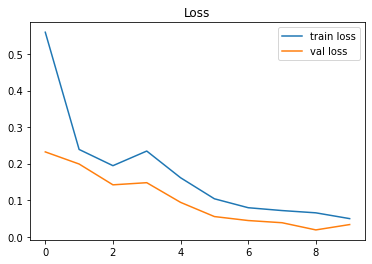

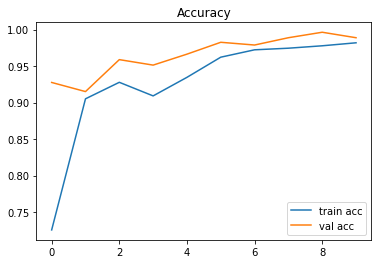

In [ ]:
plt.plot(cnn_history.history['loss'], label='train loss')
plt.plot(cnn_history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

plt.plot(cnn_history.history['accuracy'], label='train acc')
plt.plot(cnn_history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

**Evaluation**

In [ ]:
cnn_auc = model.evaluate(test_set)

31/31 [==============================] - 3s 97ms/step - loss: 0.0625 - accuracy: 0.9798


In [ ]:
# Saving model weights
model.save('mobile_net-2.h5')

In [ ]:
test_pred = model.predict(test_set)
test_pred = np.argmax(test_pred,axis = 1)
test_labels = test_set.labels

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

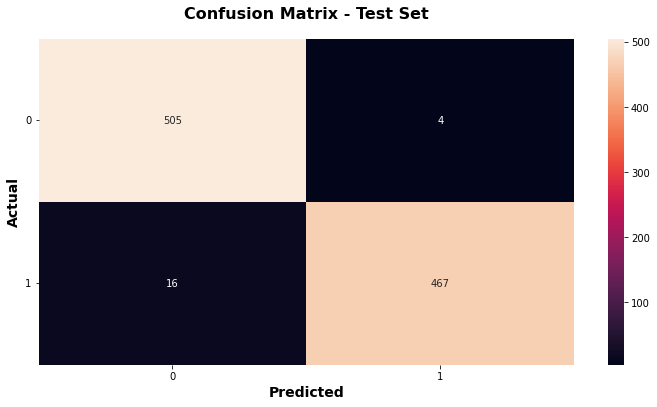

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(tf.math.confusion_matrix(
    test_labels,
    test_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None,
),annot = True,
  fmt="d")
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =0);

ax.set_ylabel('Actual',fontsize = 14,weight = 'bold') 
ax.set_yticklabels(ax.get_yticklabels(),rotation =0);
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(test_labels,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       509
           1       0.99      0.97      0.98       483

    accuracy                           0.98       992
   macro avg       0.98      0.98      0.98       992
weighted avg       0.98      0.98      0.98       992



# Prediction with CNN

In [ ]:
def predict(path):

    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224),interpolation=cv2.INTER_NEAREST)
    plt.axis('off')
    plt.imshow(img)
    img = np.expand_dims(img,axis=0)
    predict = model.predict(img)
    predict = np.argmax(predict,axis = 1)

    if predict == 1:
      print('With Mask')
    else:
      print('No Mask')



In [ ]:
predict('filepath.jpg')